In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('./application_record.csv')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
df.loc[df.OCCUPATION_TYPE.isnull(), 'OCCUPATION_TYPE'] = "NA"

In [4]:
text = " ".join(occupation for occupation in df.OCCUPATION_TYPE.astype(str))
print ("There are {} words in the combination of all cells in column OCCUPATION_TYPE.".format(len(text)))

There are 3899897 words in the combination of all cells in column OCCUPATION_TYPE.


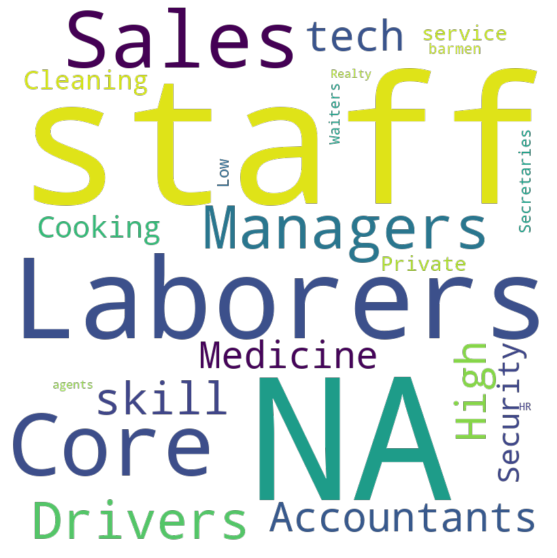

In [5]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(collocations=False, width=800, height=800, mode = "RGBA", background_color=None).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# Generate percentage of male vs female for Canva pie chart
df.CODE_GENDER.value_counts(normalize=True)

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

In [7]:
# Generate value counts for histogram on Canva
df.CNT_FAM_MEMBERS.value_counts()

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
8.0          4
14.0         4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [8]:
df.NAME_INCOME_TYPE.value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [9]:
df.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].median()

OCCUPATION_TYPE
Accountants              184500.0
Cleaning staff           135000.0
Cooking staff            135000.0
Core staff               171000.0
Drivers                  180000.0
HR staff                 180000.0
High skill tech staff    180000.0
IT staff                 180000.0
Laborers                 157500.0
Low-skill Laborers       135000.0
Managers                 238500.0
Medicine staff           157500.0
NA                       157500.0
Private service staff    180000.0
Realty agents            225000.0
Sales staff              157500.0
Secretaries              135000.0
Security staff           157500.0
Waiters/barmen staff     135000.0
Name: AMT_INCOME_TOTAL, dtype: float64